In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import *
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
df=pd.read_excel('D:\imputed.xlsx')
df

,Surface modification,SizeTEM (nm),Zeta potential,Incubation protein source,Incubation plasma concentration (v/v%),Incubation NP concentration (mg/L),Centrifugation speed (g),Centrifugation time （min）,Certrifugation temperature (℃),NP type,...,P12814 Alpha-actinin-1辅肌动蛋白,P61224 Ras-related protein Rap-1b,Q13201 Multimerin-1多聚蛋白,P67936 Tropomyosin alpha-4 chain原肌球蛋白-4链,P01034 Cystatin-C胱抑素,P81605 Dermcidin皮离蛋白,P11226 Mannose-binding protein C甘露糖结合蛋白C,P39039 · MBL1_MOUSEMannose-binding protein A甘露糖结合蛋白A,α-1-antiproteinase抗蛋白酶,Titin 肌联蛋白
0,MES,113.2613,-23.536850,RP,54.6415,30000.0,10000.0,10.0,19.60,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MHDA,117.5049,-21.607642,RP,47.2758,30000.0,10000.0,10.0,18.45,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PEG,96.8000,-23.900000,RP,49.0960,300.0,15000.0,15.0,6.74,liposome,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ABD,92.2000,-16.300000,RP,51.8803,300.0,15000.0,15.0,9.93,liposome,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MUA,36.0000,-8.400000,RP,77.9283,25.0,16000.0,120.0,4.00,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,FAU,10.0000,-50.000000,HP,100.0000,40000.0,24000.0,30.0,25.00,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
710,FAU,10.0000,-50.000000,HP,100.0000,80000.0,24000.0,30.0,25.00,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
711,FAU,10.0000,-50.000000,HP,100.0000,80000.0,24000.0,30.0,25.00,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
712,FAU,10.0000,-50.000000,HP,100.0000,120000.0,24000.0,30.0,25.00,other,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
def norm_comparision_plot(data, title, figsize=(8, 6), color="#099DD9", ax=None, surround=True, grid=True):
    plt.figure(figsize=figsize)  # 设置图片大小
    sns.distplot(data, fit=norm, color=color, kde_kws={"color": color, "lw": 3}, ax=ax)
    (mu, sigma) = norm.fit(data)  # 求同等条件下正态分布的 mu 和 sigma
    plt.legend([title+'概率密度图', '正态分布曲线拟合图 ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title(title+' '+"Distribution")
    if surround == True:
        sns.despine(trim=True, left=True, offset=10)
    if grid == True:
        plt.grid(True)
    plt.show()

In [53]:
# plt.axes(aspect='equal')  #将横、纵坐标轴标准化处理，确保饼图是一个正圆，否则为椭圆
def pie_plot(data, title):
    edu = list(data[title].value_counts(sort=False)/len(data))
    labels = data[title].unique()
    # explode = [0, 0.1, 0, 0, 0]
    
    plt.pie(x=edu,  #绘图数据（百分比）
            explode=None, #指定饼图某些部分的突出显示，即呈现爆炸式
            labels=labels,  #添加标签
            colors=None,
            autopct='%.2f%%',  #设置百分比的格式，这里保留两位小数
            pctdistance=0.8,  #设置百分比标签与圆心的距离
            labeldistance=1.1,  #设置标签与圆心的距离
            startangle=180,  #设置饼图的初始角度
            radius=1.2,  #设置饼图的半径
            counterclock=False,  #是否逆时针，这里设置为顺时针方向
            # wedgeprops={'linewidth':1.5, 'edgecolor':'black'},  #设置饼图内外边界的属性值
            textprops={'fontsize':10, 'color':'black'},  #设置文本标签的属性值
            )
    
    #添加图标题
    plt.title('{}的分布情况'.format(title))
    #显示图形
    plt.show()

C:\Users\marcus\AppData\Local\Temp\ipykernel_11388\1827691299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm, color=color, kde_kws={"color": color, "lw": 3}, ax=ax)


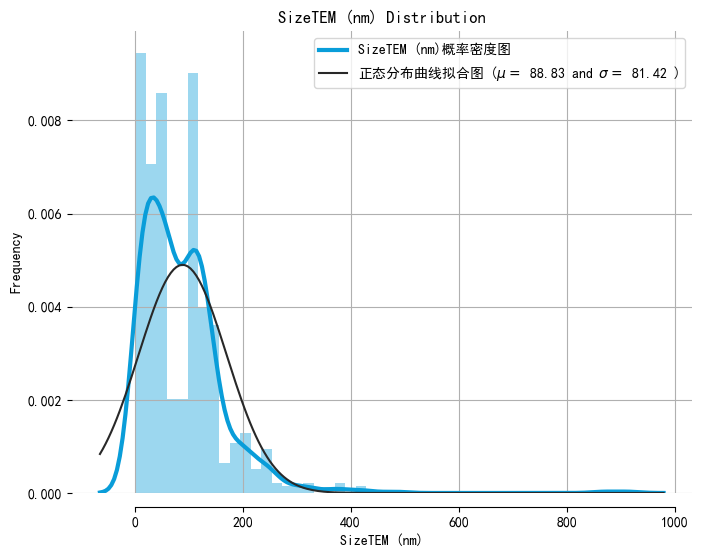

C:\Users\marcus\AppData\Local\Temp\ipykernel_11388\1827691299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm, color=color, kde_kws={"color": color, "lw": 3}, ax=ax)


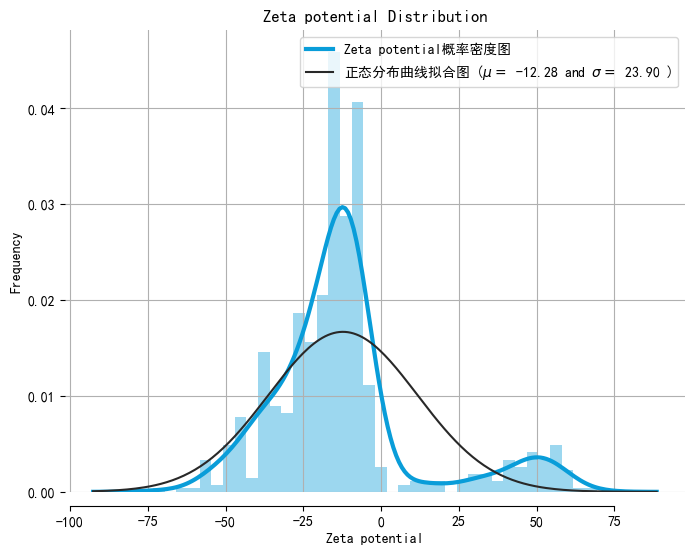

C:\Users\marcus\AppData\Local\Temp\ipykernel_11388\1827691299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm, color=color, kde_kws={"color": color, "lw": 3}, ax=ax)


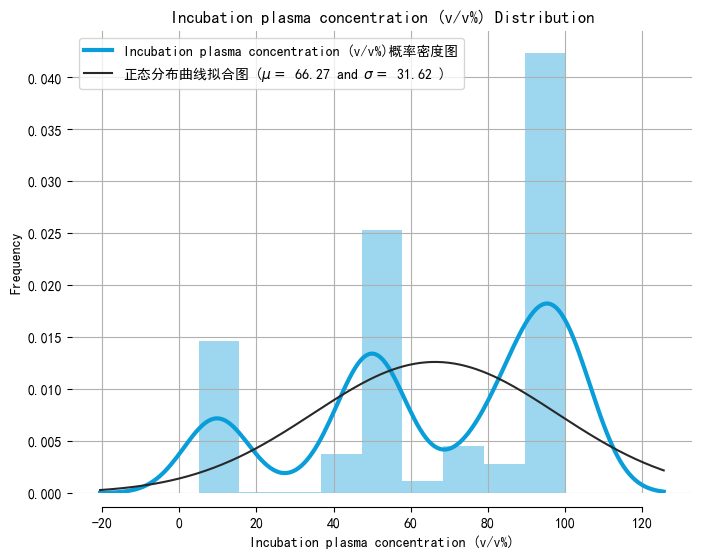

C:\Users\marcus\AppData\Local\Temp\ipykernel_11388\1827691299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm, color=color, kde_kws={"color": color, "lw": 3}, ax=ax)


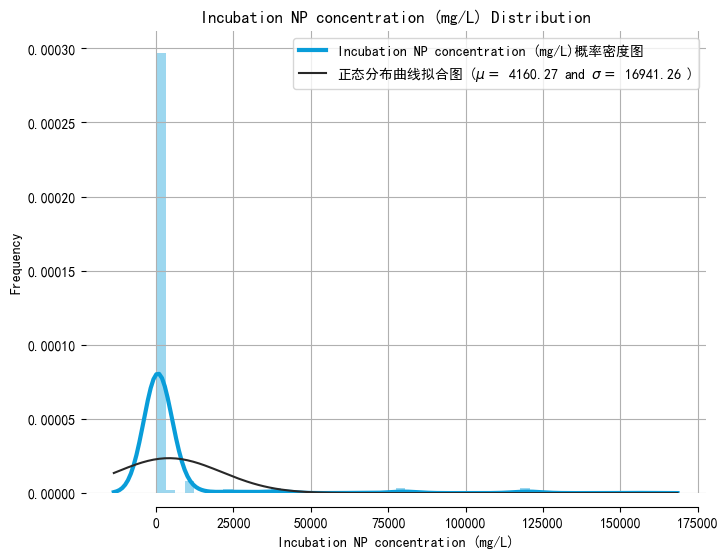

C:\Users\marcus\AppData\Local\Temp\ipykernel_11388\1827691299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm, color=color, kde_kws={"color": color, "lw": 3}, ax=ax)


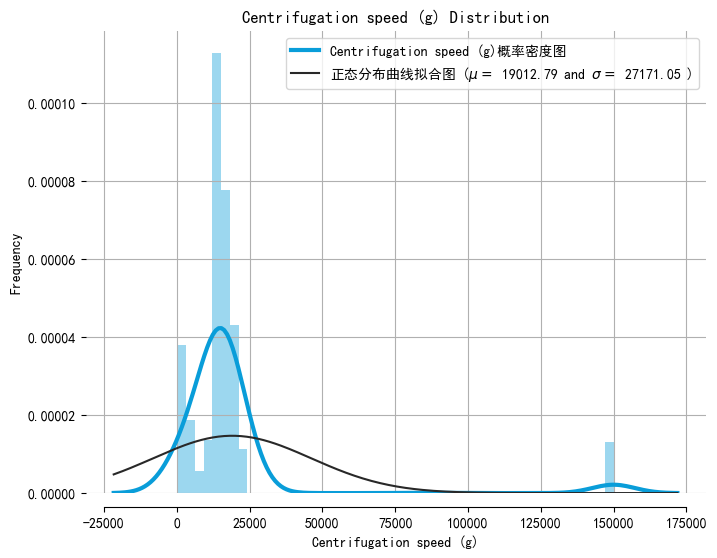

C:\Users\marcus\AppData\Local\Temp\ipykernel_11388\1827691299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm, color=color, kde_kws={"color": color, "lw": 3}, ax=ax)


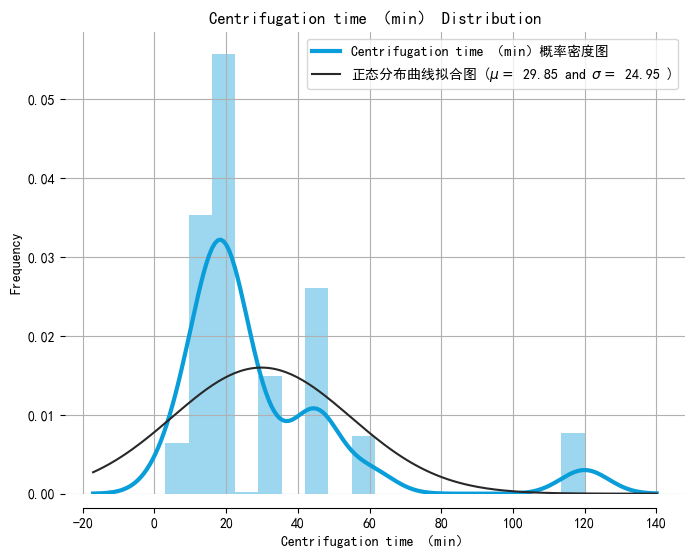

C:\Users\marcus\AppData\Local\Temp\ipykernel_11388\1827691299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm, color=color, kde_kws={"color": color, "lw": 3}, ax=ax)


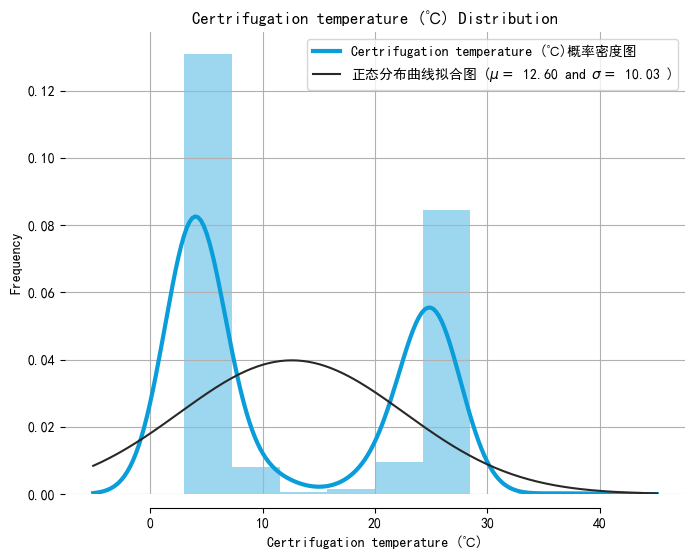

C:\Users\marcus\AppData\Local\Temp\ipykernel_11388\1827691299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm, color=color, kde_kws={"color": color, "lw": 3}, ax=ax)


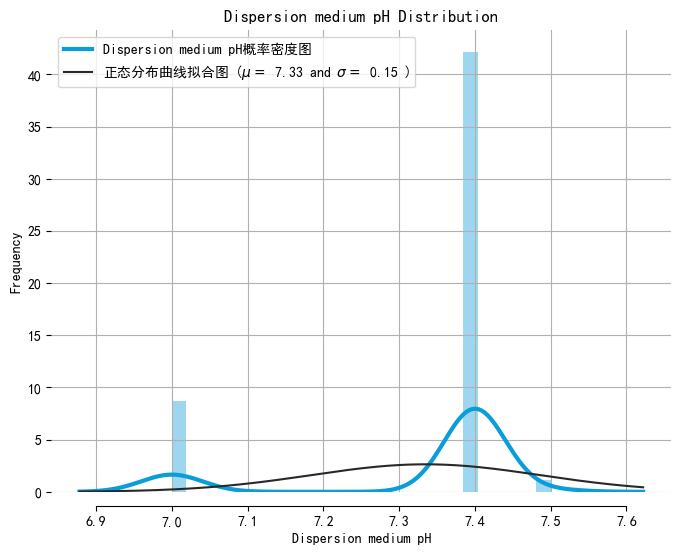

C:\Users\marcus\AppData\Local\Temp\ipykernel_11388\1827691299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm, color=color, kde_kws={"color": color, "lw": 3}, ax=ax)


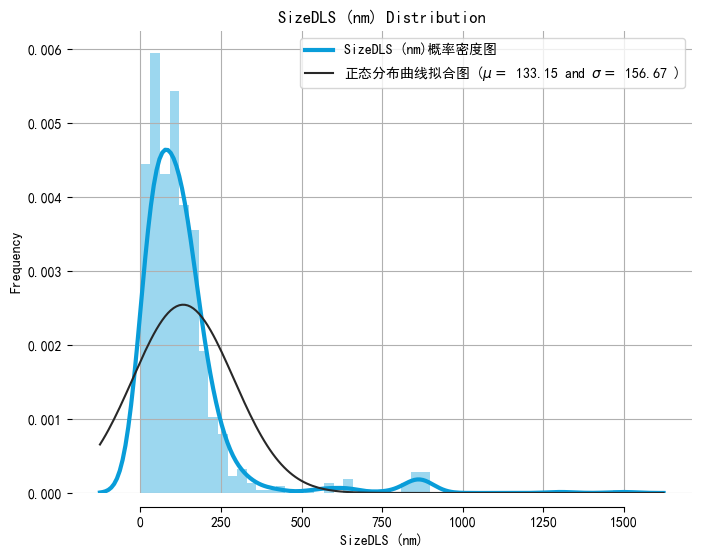

C:\Users\marcus\AppData\Local\Temp\ipykernel_11388\1827691299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm, color=color, kde_kws={"color": color, "lw": 3}, ax=ax)


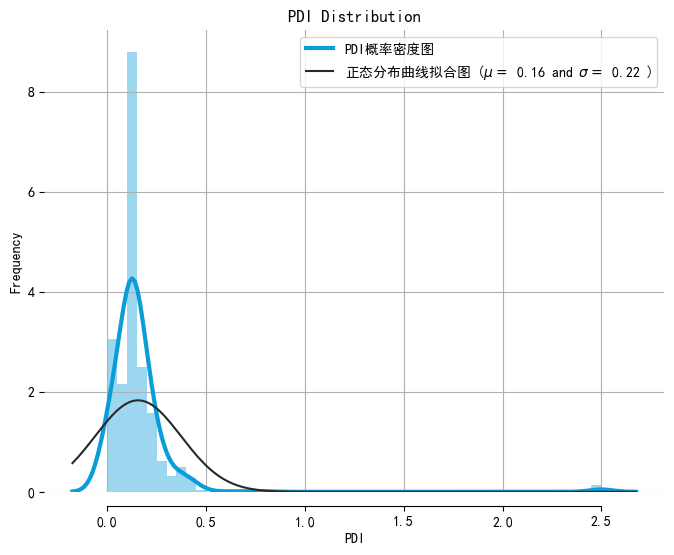

C:\Users\marcus\AppData\Local\Temp\ipykernel_11388\1827691299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm, color=color, kde_kws={"color": color, "lw": 3}, ax=ax)


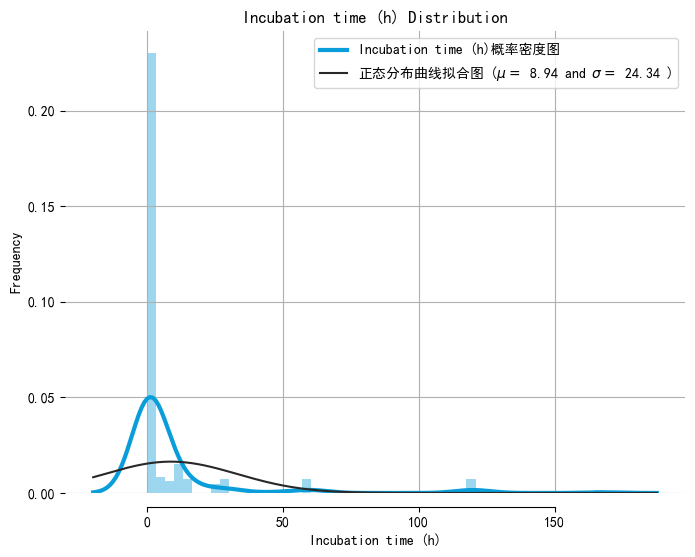

C:\Users\marcus\AppData\Local\Temp\ipykernel_11388\1827691299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm, color=color, kde_kws={"color": color, "lw": 3}, ax=ax)


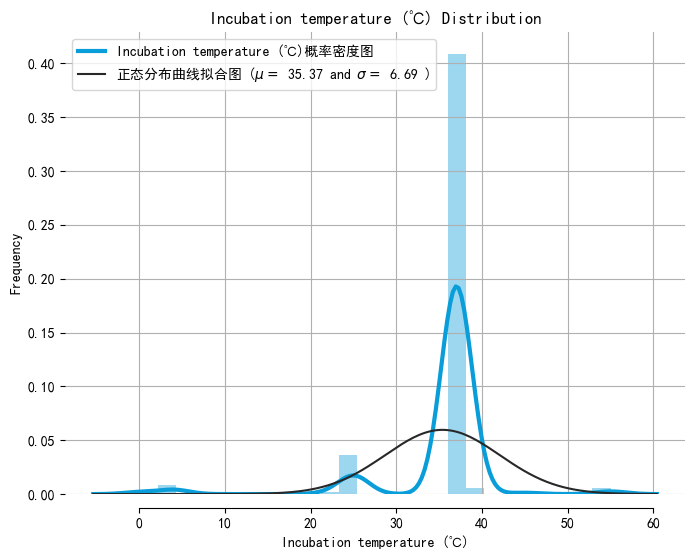

C:\Users\marcus\AppData\Local\Temp\ipykernel_11388\1827691299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm, color=color, kde_kws={"color": color, "lw": 3}, ax=ax)


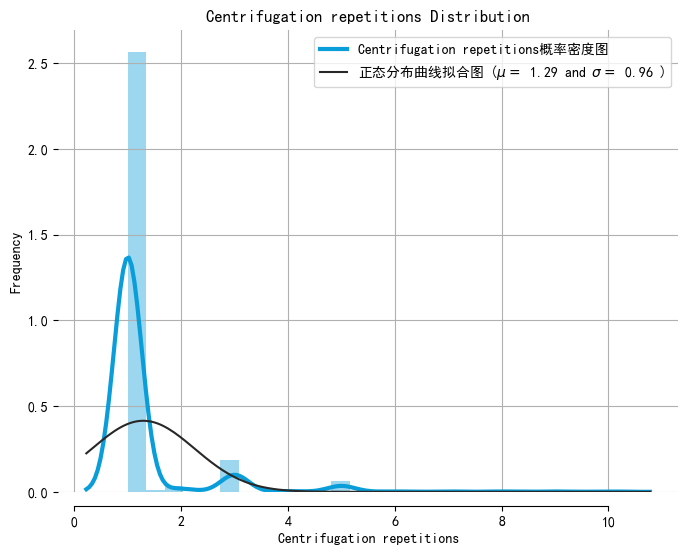

In [182]:
quantitative = ['SizeTEM (nm)','Zeta potential','Incubation plasma concentration (v/v%)','Incubation NP concentration (mg/L)','Centrifugation speed (g)','Centrifugation time （min）','Certrifugation temperature (℃)','Dispersion medium pH','SizeDLS (nm)','PDI','Incubation time (h)','Incubation temperature (℃)','Centrifugation repetitions']

for item in quantitative:
    norm_comparision_plot(df[item], item)
    plt.show()

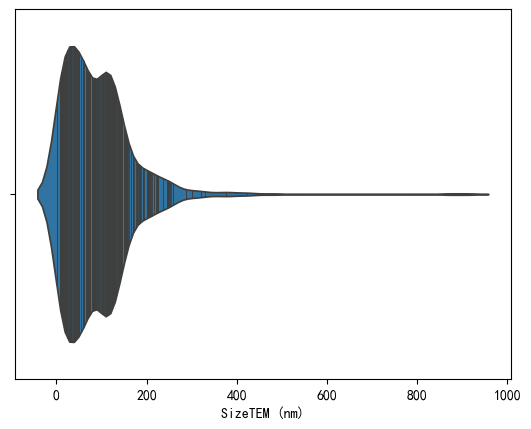

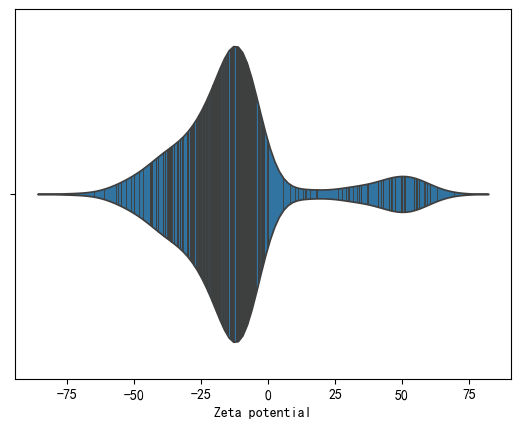

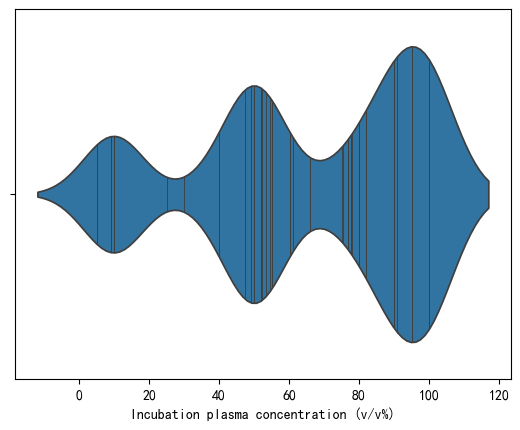

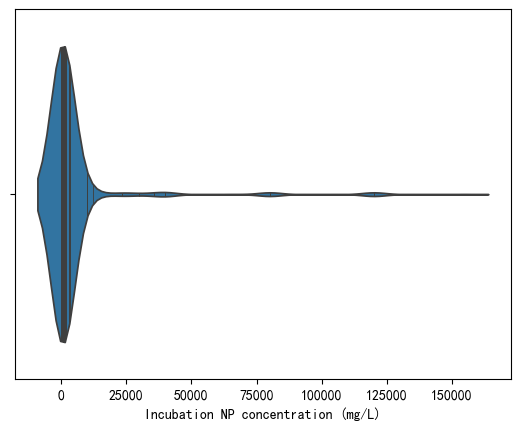

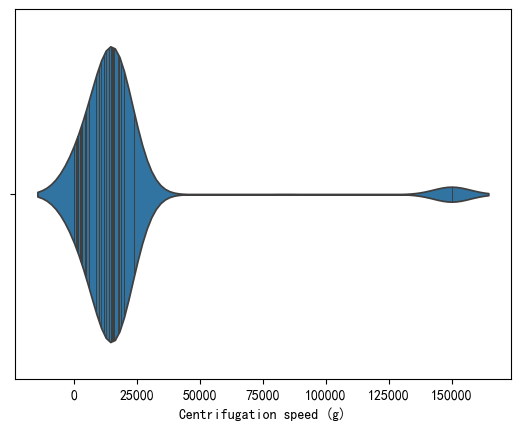

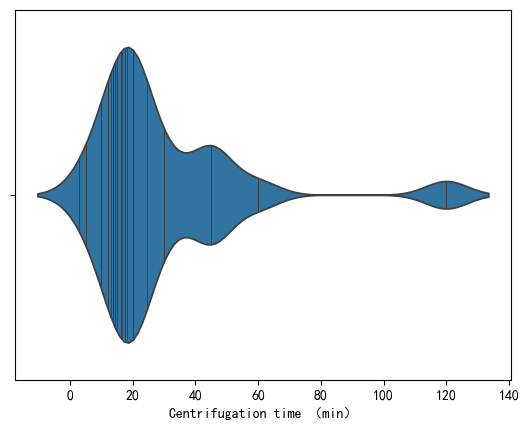

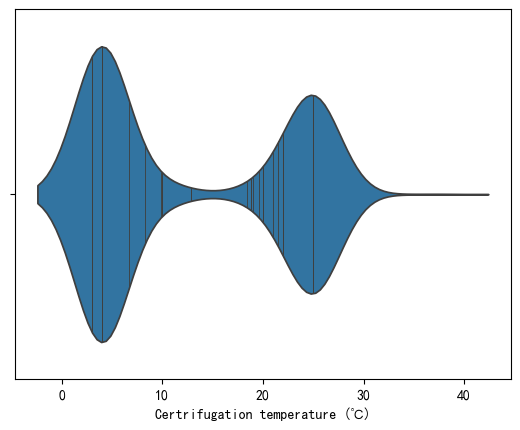

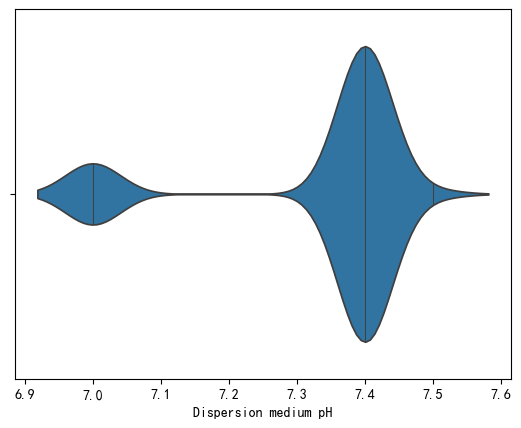

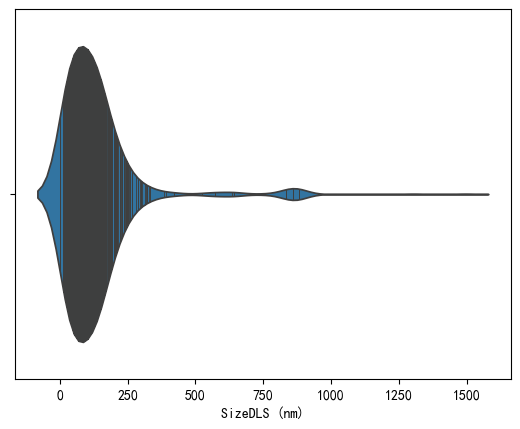

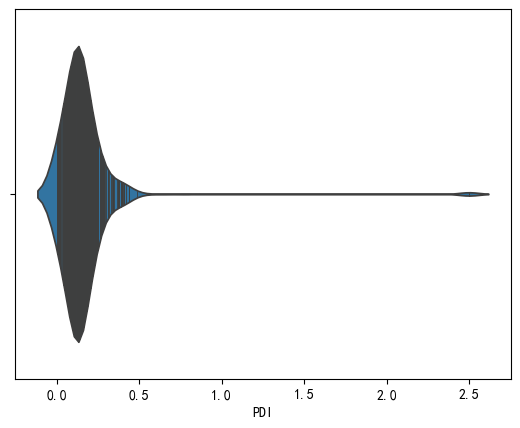

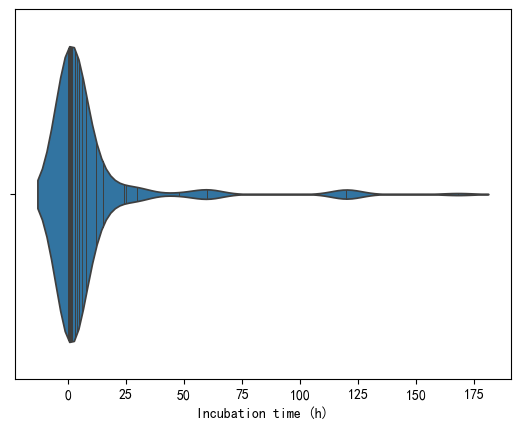

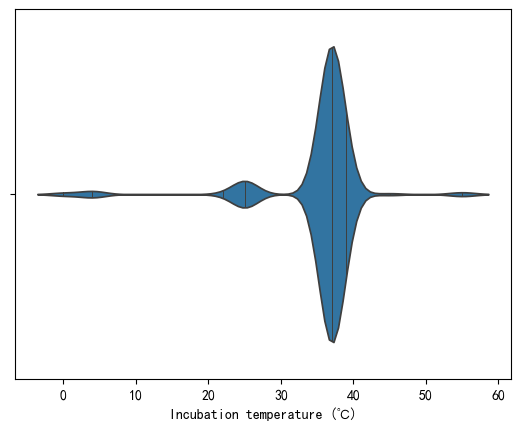

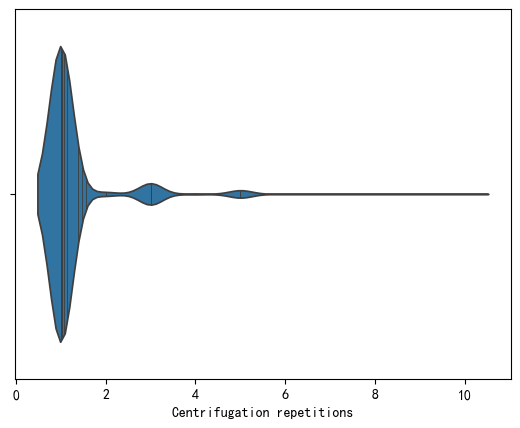

In [180]:
for item in quantitative:
    sns.violinplot(data=df, x=item, inner="stick")
    plt.show()

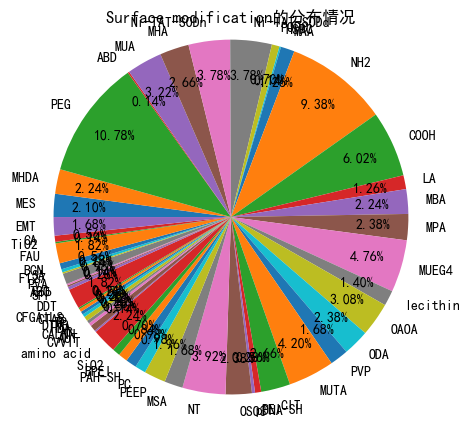

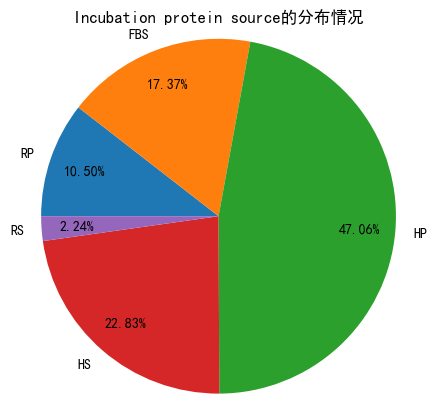

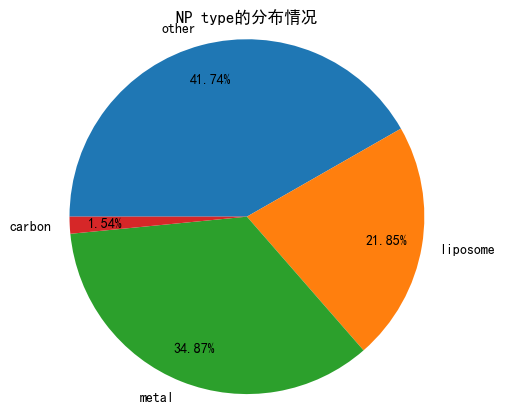

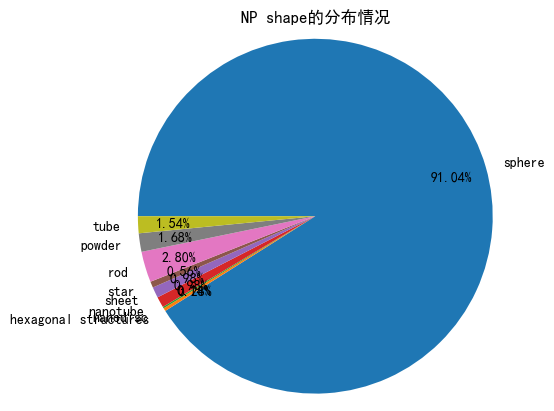

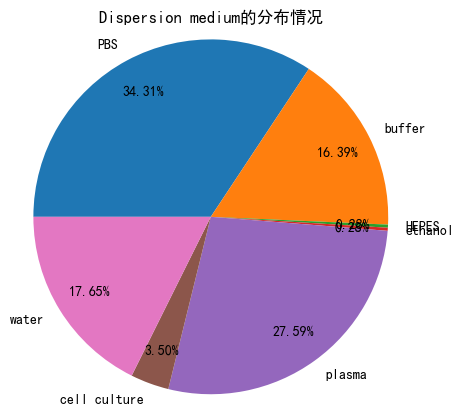

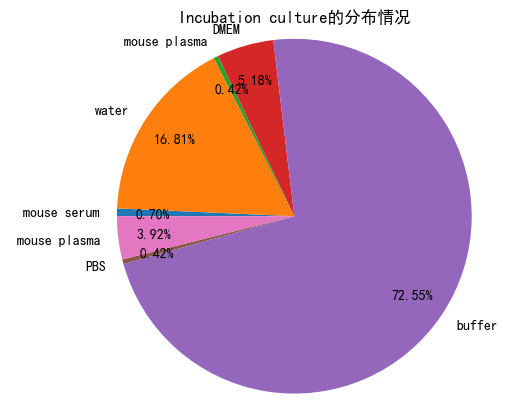

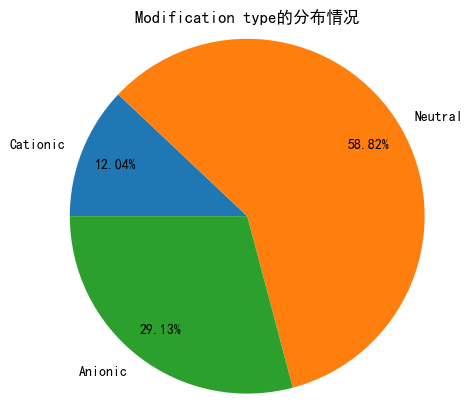

In [184]:
qualitative = ['Surface modification','Incubation protein source','NP type','NP shape','Dispersion medium','Incubation culture','Modification type']
for item in qualitative:
    pie_plot(df, item)
    plt.show()

In [94]:
exception = pd.read_csv('exception.csv').sort_values('exceptional R2 score', ascending=True)
exception

,exceptional R2 label,exceptional R2 score
2,P01599 Immunoglobulin kappa variable 1-17免疫球蛋白变量,-8943.552267
14,Q9UGM5 Fetuin-B 胎球蛋白,-3835.490086
0,P01593 Immunoglobulin kappa variable 1D-33免疫球蛋白变量,-3158.537180
11,P22891 Vitamin K-dependent protein Z维生素k,-3102.840135
10,Q14520 Hyaluronan-binding protein 2透明质酸结合蛋白,-2445.122148
5,P08709 Coagulation factor VII凝固因子,-894.345852
12,P06733 Alpha-enolase烯醇酶,-473.212460
13,P63104 14-3-3 protein zeta/delta,-464.694126
9,P05154 Plasma serine protease inhibitor血浆丝氨酸蛋白...,-343.412953
1,P01700 Immunoglobulin lambda variable 1-47 免疫球...,-185.145444


In [105]:
a = exception[0:5]
a

,exceptional R2 label,exceptional R2 score
2,P01599 Immunoglobulin kappa variable 1-17免疫球蛋白变量,-8943.552267
14,Q9UGM5 Fetuin-B 胎球蛋白,-3835.490086
0,P01593 Immunoglobulin kappa variable 1D-33免疫球蛋白变量,-3158.537180
11,P22891 Vitamin K-dependent protein Z维生素k,-3102.840135
10,Q14520 Hyaluronan-binding protein 2透明质酸结合蛋白,-2445.122148


In [107]:
labels = a['exceptional R2 label']

In [121]:
df1 = pd.concat([df[df.columns[0:20]], df[labels]], axis=1)
df1

,Surface modification,SizeTEM (nm),Zeta potential,Incubation protein source,Incubation plasma concentration (v/v%),Incubation NP concentration (mg/L),Centrifugation speed (g),Centrifugation time （min）,Certrifugation temperature (℃),NP type,...,Incubation culture,Incubation time (h),Incubation temperature (℃),Centrifugation repetitions,Modification type,P01599 Immunoglobulin kappa variable 1-17免疫球蛋白变量,Q9UGM5 Fetuin-B 胎球蛋白,P01593 Immunoglobulin kappa variable 1D-33免疫球蛋白变量,P22891 Vitamin K-dependent protein Z维生素k,Q14520 Hyaluronan-binding protein 2透明质酸结合蛋白
0,MES,113.2613,-23.536850,RP,54.6415,30000.0,10000.0,10.0,19.60,other,...,mouse serum,12.0,37,1.0,Cationic,0.0,0.0,0.0,0.0,0.0
1,MHDA,117.5049,-21.607642,RP,47.2758,30000.0,10000.0,10.0,18.45,other,...,mouse serum,12.0,37,1.0,Neutral,0.0,0.0,0.0,0.0,0.0
2,PEG,96.8000,-23.900000,RP,49.0960,300.0,15000.0,15.0,6.74,liposome,...,water,2.0,37,1.0,Cationic,0.0,0.0,0.0,0.0,0.0
3,ABD,92.2000,-16.300000,RP,51.8803,300.0,15000.0,15.0,9.93,liposome,...,water,2.0,37,1.0,Cationic,0.0,0.0,0.0,0.0,0.0
4,MUA,36.0000,-8.400000,RP,77.9283,25.0,16000.0,120.0,4.00,other,...,mouse plasma,1.0,37,1.0,Cationic,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,FAU,10.0000,-50.000000,HP,100.0000,40000.0,24000.0,30.0,25.00,other,...,buffer,1.0,37,1.0,Neutral,0.0,0.0,0.0,0.0,0.0
710,FAU,10.0000,-50.000000,HP,100.0000,80000.0,24000.0,30.0,25.00,other,...,buffer,1.0,37,1.0,Neutral,0.0,0.0,0.0,0.0,0.0
711,FAU,10.0000,-50.000000,HP,100.0000,80000.0,24000.0,30.0,25.00,other,...,buffer,1.0,37,1.0,Neutral,0.0,0.0,0.0,0.0,0.0
712,FAU,10.0000,-50.000000,HP,100.0000,120000.0,24000.0,30.0,25.00,other,...,buffer,1.0,37,1.0,Neutral,0.0,0.0,0.0,0.0,0.0


In [122]:
le = LabelEncoder()
df1['Surface modification'] = le.fit_transform(df1['Surface modification'])
df1['Incubation protein source'] = le.fit_transform(df1['Incubation protein source'])
df1['NP type'] = le.fit_transform(df1['NP type'])
df1['NP shape'] = le.fit_transform(df1['NP shape'])
df1['Dispersion medium'] = le.fit_transform(df1['Dispersion medium'])
df1['Incubation culture'] = le.fit_transform(df1['Incubation culture'])
df1['Modification type'] = le.fit_transform(df1['Modification type'])
df1

,Surface modification,SizeTEM (nm),Zeta potential,Incubation protein source,Incubation plasma concentration (v/v%),Incubation NP concentration (mg/L),Centrifugation speed (g),Centrifugation time （min）,Certrifugation temperature (℃),NP type,...,Incubation culture,Incubation time (h),Incubation temperature (℃),Centrifugation repetitions,Modification type,P01599 Immunoglobulin kappa variable 1-17免疫球蛋白变量,Q9UGM5 Fetuin-B 胎球蛋白,P01593 Immunoglobulin kappa variable 1D-33免疫球蛋白变量,P22891 Vitamin K-dependent protein Z维生素k,Q14520 Hyaluronan-binding protein 2透明质酸结合蛋白
0,23,113.2613,-23.536850,3,54.6415,30000.0,10000.0,10.0,19.60,3,...,5,12.0,37,1.0,1,0.0,0.0,0.0,0.0,0.0
1,25,117.5049,-21.607642,3,47.2758,30000.0,10000.0,10.0,18.45,3,...,5,12.0,37,1.0,2,0.0,0.0,0.0,0.0,0.0
2,41,96.8000,-23.900000,3,49.0960,300.0,15000.0,15.0,6.74,1,...,6,2.0,37,1.0,1,0.0,0.0,0.0,0.0,0.0
3,0,92.2000,-16.300000,3,51.8803,300.0,15000.0,15.0,9.93,1,...,6,2.0,37,1.0,1,0.0,0.0,0.0,0.0,0.0
4,28,36.0000,-8.400000,3,77.9283,25.0,16000.0,120.0,4.00,3,...,4,1.0,37,1.0,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,17,10.0000,-50.000000,1,100.0000,40000.0,24000.0,30.0,25.00,3,...,3,1.0,37,1.0,2,0.0,0.0,0.0,0.0,0.0
710,17,10.0000,-50.000000,1,100.0000,80000.0,24000.0,30.0,25.00,3,...,3,1.0,37,1.0,2,0.0,0.0,0.0,0.0,0.0
711,17,10.0000,-50.000000,1,100.0000,80000.0,24000.0,30.0,25.00,3,...,3,1.0,37,1.0,2,0.0,0.0,0.0,0.0,0.0
712,17,10.0000,-50.000000,1,100.0000,120000.0,24000.0,30.0,25.00,3,...,3,1.0,37,1.0,2,0.0,0.0,0.0,0.0,0.0


In [123]:
cor = df1.corr()  # 默认method='pearson'
cor

,Surface modification,SizeTEM (nm),Zeta potential,Incubation protein source,Incubation plasma concentration (v/v%),Incubation NP concentration (mg/L),Centrifugation speed (g),Centrifugation time （min）,Certrifugation temperature (℃),NP type,...,Incubation culture,Incubation time (h),Incubation temperature (℃),Centrifugation repetitions,Modification type,P01599 Immunoglobulin kappa variable 1-17免疫球蛋白变量,Q9UGM5 Fetuin-B 胎球蛋白,P01593 Immunoglobulin kappa variable 1D-33免疫球蛋白变量,P22891 Vitamin K-dependent protein Z维生素k,Q14520 Hyaluronan-binding protein 2透明质酸结合蛋白
Surface modification,1.000000,0.159235,0.171199,0.203910,-0.040726,-0.180548,0.257634,0.179654,-0.017591,-0.403229,...,0.091084,-0.095141,0.058572,0.147182,0.283859,-0.051593,-0.153525,-0.036729,-0.070258,-0.049429
SizeTEM (nm),0.159235,1.000000,0.129963,-0.036000,-0.198862,-0.167490,0.093066,-0.099275,0.150920,-0.158583,...,-0.041022,0.000612,-0.027338,0.010579,0.189403,-0.055392,-0.026245,-0.083518,0.002154,0.053421
Zeta potential,0.171199,0.129963,1.000000,-0.029864,0.039217,-0.225233,-0.076186,-0.062993,0.024492,-0.302484,...,0.148793,-0.060909,0.134451,-0.205295,0.011416,-0.042277,-0.036247,-0.072253,0.135957,0.143044
Incubation protein source,0.203910,-0.036000,-0.029864,1.000000,0.243275,-0.054427,0.305730,0.519731,-0.247569,-0.377628,...,0.115055,-0.068840,-0.122367,0.171355,0.012568,-0.025840,-0.177444,-0.023185,0.048326,0.036435
Incubation plasma concentration (v/v%),-0.040726,-0.198862,0.039217,0.243275,1.000000,-0.036409,-0.174559,0.148204,-0.468371,0.182627,...,0.164110,0.101607,0.260711,-0.084596,-0.241120,-0.061743,-0.094137,-0.153910,0.108820,0.102555
Incubation NP concentration (mg/L),-0.180548,-0.167490,-0.225233,-0.054427,-0.036409,1.000000,0.025217,0.008174,0.204244,0.163302,...,-0.041367,-0.071762,0.045768,-0.065546,0.094646,0.032142,-0.033700,0.026137,-0.064976,-0.059866
Centrifugation speed (g),0.257634,0.093066,-0.076186,0.305730,-0.174559,0.025217,1.000000,0.720498,-0.145169,-0.249022,...,-0.462300,0.043051,0.051333,0.316376,0.185662,-0.033344,-0.036412,-0.031853,-0.080672,-0.079135
Centrifugation time （min）,0.179654,-0.099275,-0.062993,0.519731,0.148204,0.008174,0.720498,1.000000,-0.299922,-0.106998,...,-0.395529,-0.058349,0.200802,0.228053,-0.086595,-0.031662,-0.025099,-0.034523,0.005869,-0.019493
Certrifugation temperature (℃),-0.017591,0.150920,0.024492,-0.247569,-0.468371,0.204244,-0.145169,-0.299922,1.000000,-0.041790,...,0.105708,-0.128849,-0.131546,0.131803,0.251660,0.036876,0.173949,0.120336,-0.064173,-0.065705
NP type,-0.403229,-0.158583,-0.302484,-0.377628,0.182627,0.163302,-0.249022,-0.106998,-0.041790,1.000000,...,-0.203075,0.264198,0.113287,-0.055863,-0.126305,0.084843,0.104624,0.095653,-0.139155,-0.093952


<Axes: >

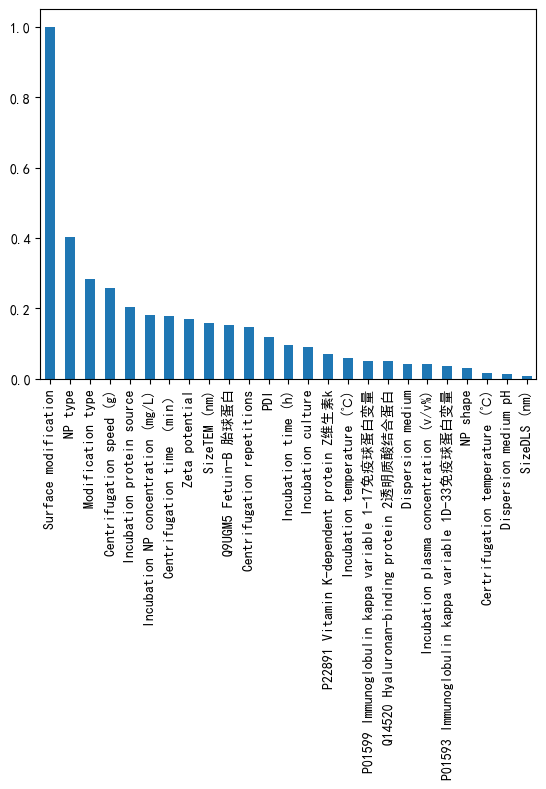

In [172]:
X = df1[df1.columns[0:20]]
Y = df1[df1.columns[20:]]
correlations = df1.corrwith(df1.iloc[:,0]).abs()
correlations.sort_values(ascending=False, inplace=True) 
correlations.plot.bar()

<Axes: >

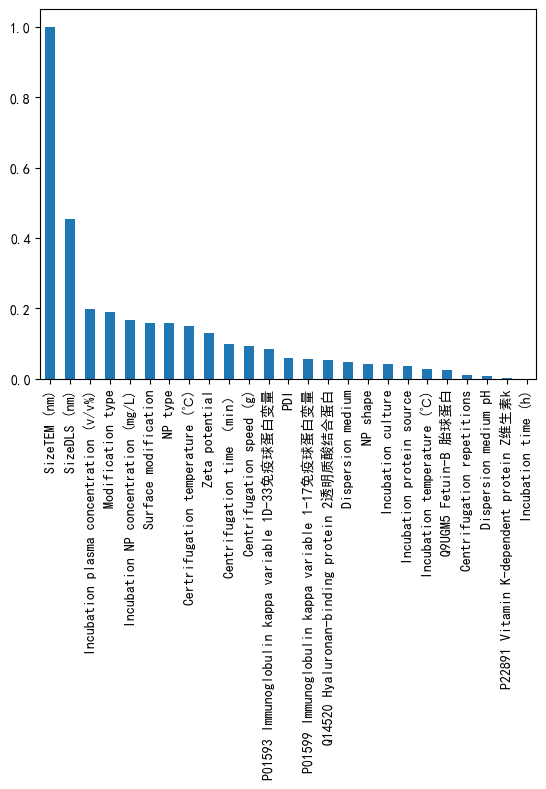

In [173]:
correlations = df1.corrwith(df1.iloc[:,1]).abs()
correlations.sort_values(ascending=False, inplace=True) 
correlations.plot.bar()

<Axes: >

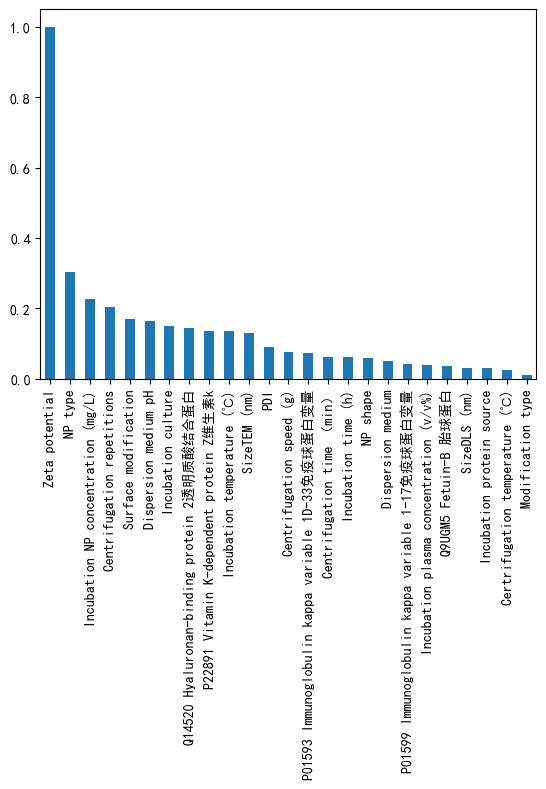

In [174]:
correlations = df1.corrwith(df1.iloc[:,2]).abs()
correlations.sort_values(ascending=False, inplace=True) 
correlations.plot.bar()

<Axes: >

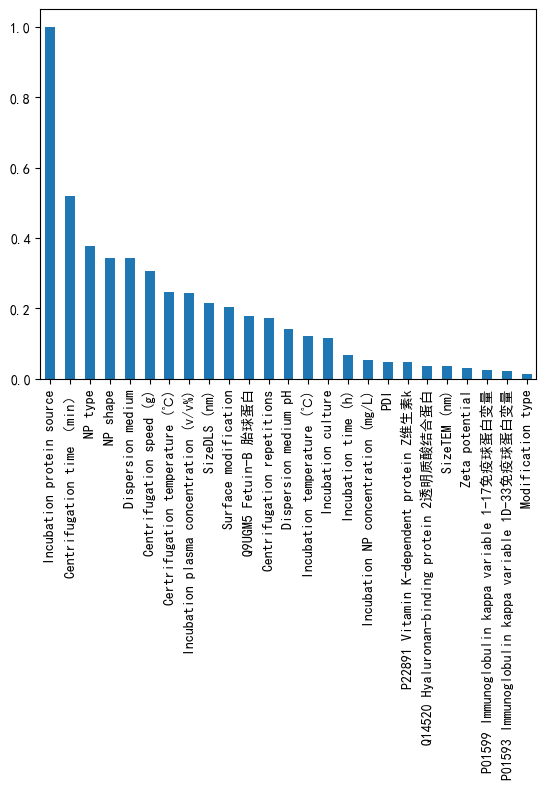

In [175]:
correlations = df1.corrwith(df1.iloc[:,3]).abs()
correlations.sort_values(ascending=False, inplace=True) 
correlations.plot.bar()

<Axes: >

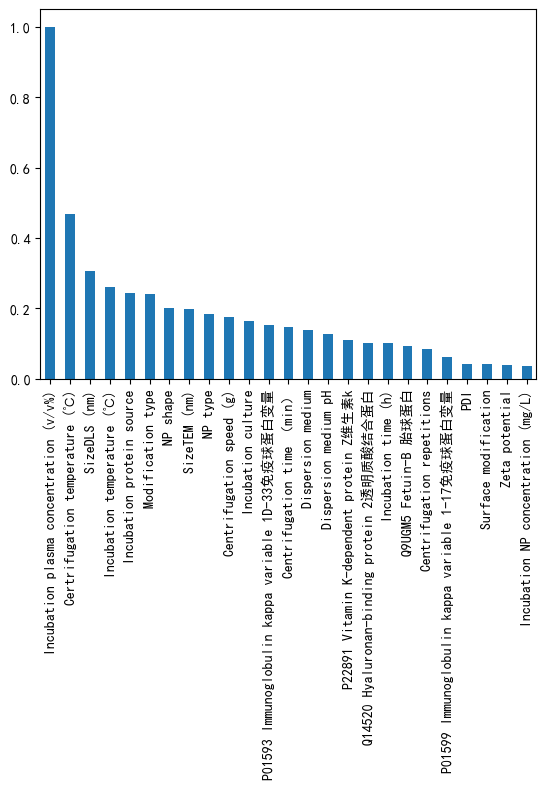

In [176]:
correlations = df1.corrwith(df1.iloc[:,4]).abs()
correlations.sort_values(ascending=False, inplace=True) 
correlations.plot.bar()

<Axes: >

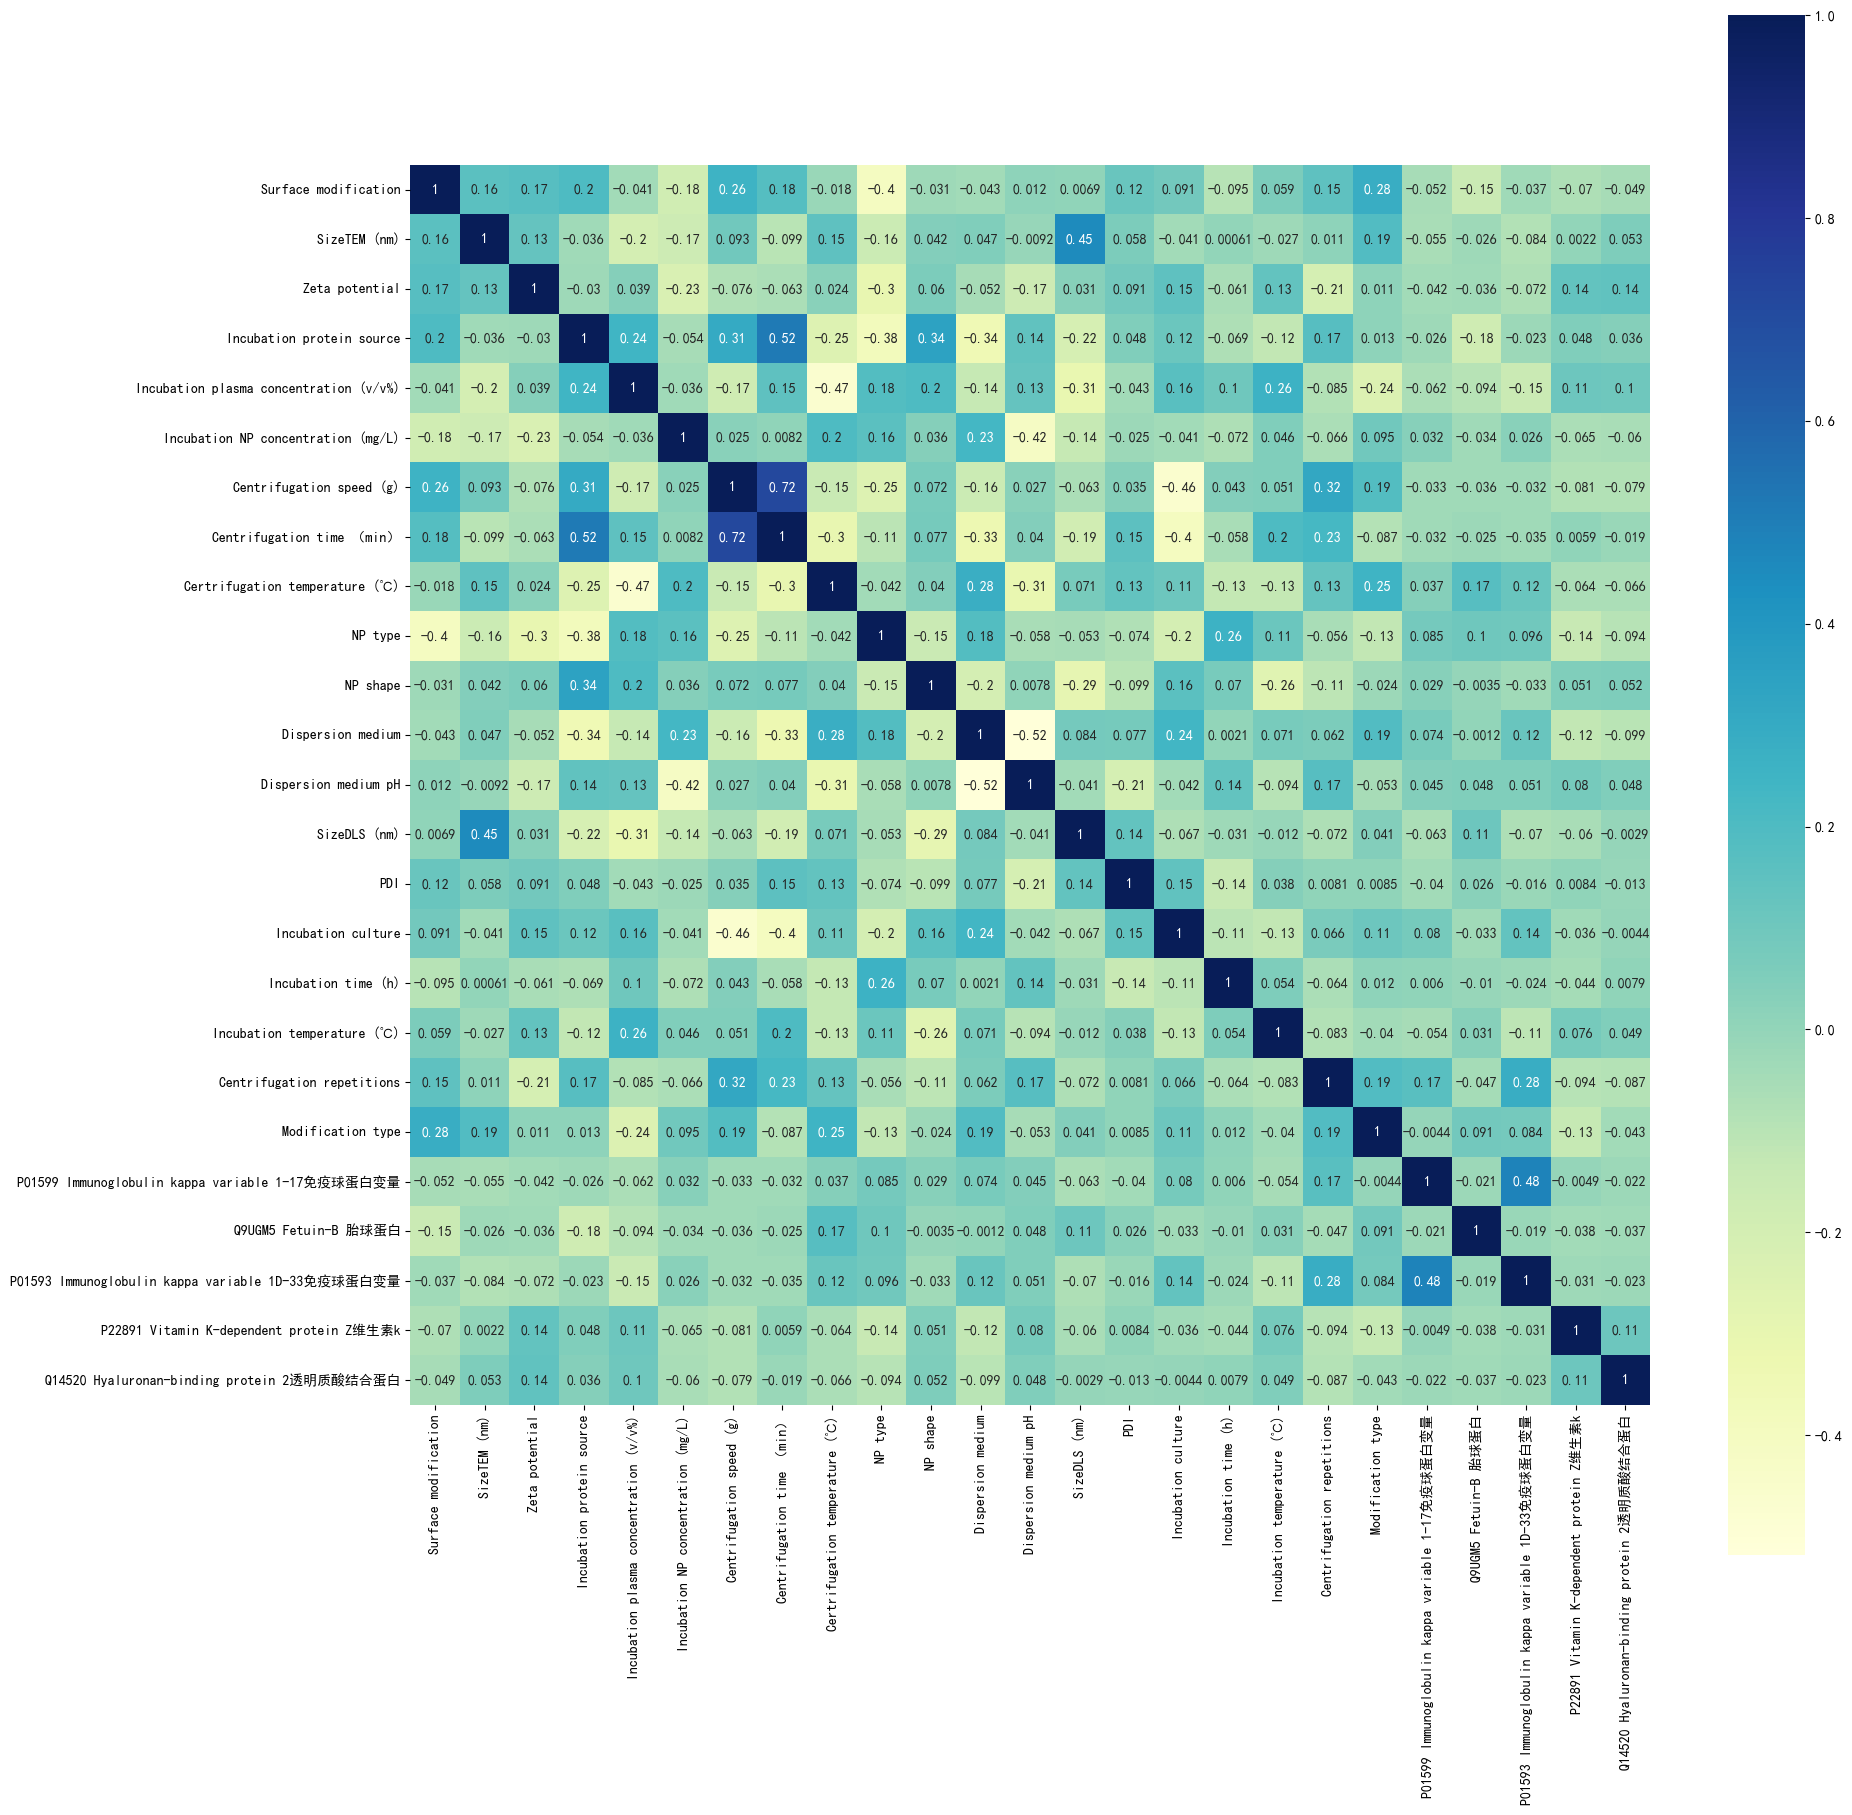

In [126]:
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(cor, cmap='YlGnBu', xticklabels=True, yticklabels=True,
            annot=True, square=True)

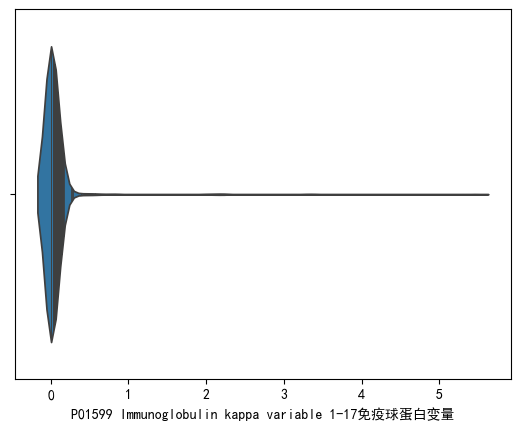

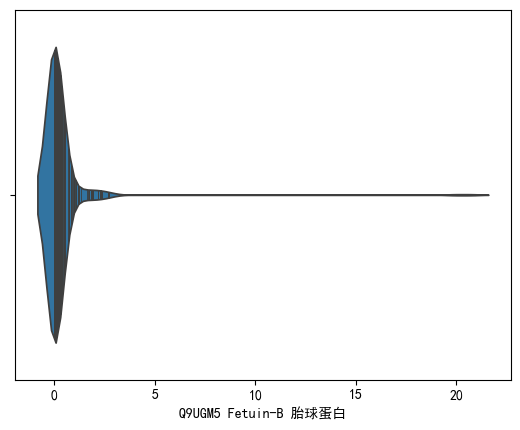

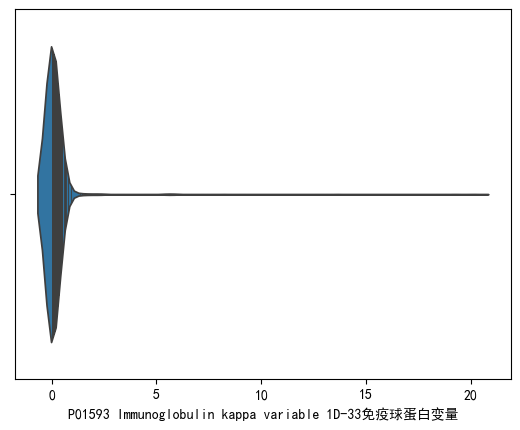

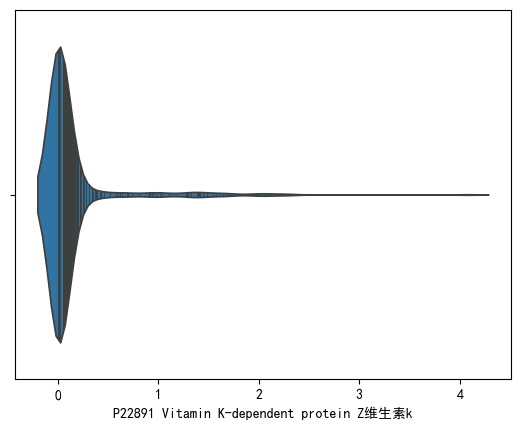

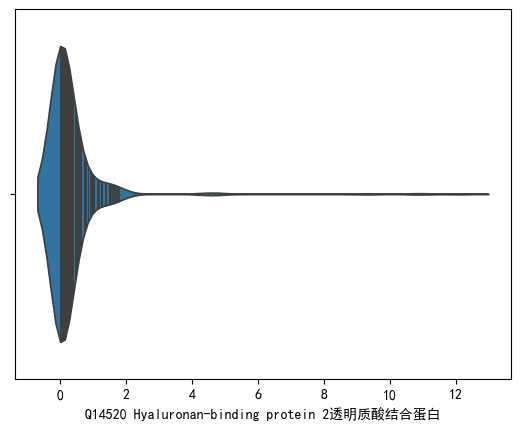

In [177]:
# 数据分布
for item in labels:
    sns.violinplot(data=df, x=item, inner="stick")
    plt.show()

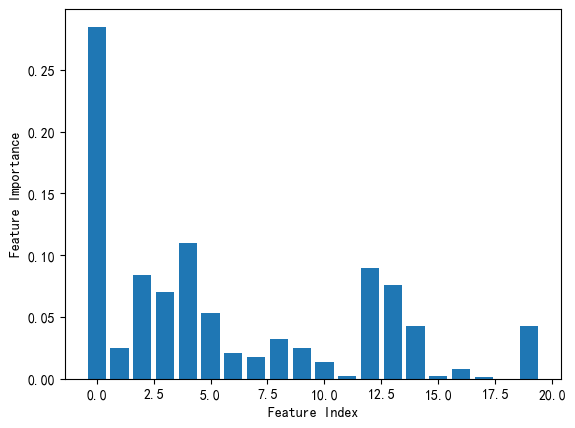

In [178]:
# 变量重要性分析
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X, Y)

importances = regressor.feature_importances_
 
# Plot importances
plt.bar(range(X.shape[1]), importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.show()

Text(0, 0.5, 'Explained Variance')

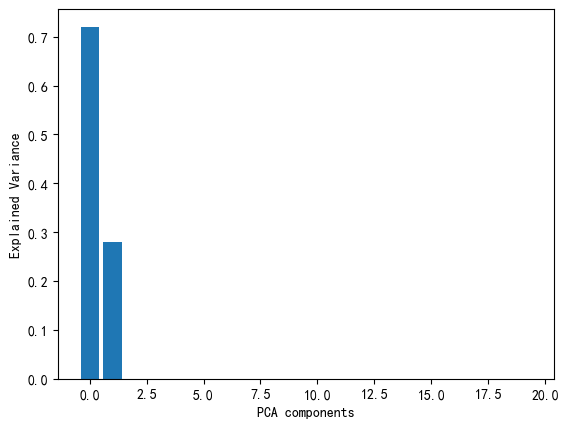

In [179]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')